# 2010 Baja CA EQ, QTM Catalog Mapping: Density Grid Test Point2



In [1]:
# IMPORT CELL; updated 2/11/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

import obspy
from obspy.core import UTCDateTime
from obspy import read

import obspy.geodetics as gd # Imported whole file
#from obspy.geodetics import locations2degrees # calc_dist() alike?
#from obspy.taup.taup_geo import calc_dist # calc_dist()

import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

print("Imported! ")

Imported! 


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 556 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


## Density Grid: Second Point - Point2
Along fault line<br>(32.6585, -115.8862)

In [3]:
GridPoints = pd.read_csv("Maps/Density Grid/GridPoints.csv")

In [4]:
# Create second point for analysis: fault line

Point2 = pd.DataFrame({"LATITUDE" : [32.6585], "LONGITUDE" : [-115.8862]})
#Point2["LATITUDE"] = 33.0403 # 33.0403, -116.5071
Point2

,LATITUDE,LONGITUDE
0,32.6585,-115.8862


In [5]:
# Use ObsPy: locations2degrees function (returns distance between two points)
# location2degrees(source_lat_deg, source_lon_deg, receiver_lat_deg, receiver_lon_deg)
# returns distance in degrees as float

Dists2_Deg = gd.locations2degrees(Point2.LATITUDE, Point2.LONGITUDE, 
                              QTM_Range.LATITUDE, QTM_Range.LONGITUDE)
# Got distances of all earthquakes in catalog from Point2
Dists2_KM = gd.degrees2kilometers(Dists2_Deg)
# Converted all distances to kilometers
Dists2_KM

array([ 132.45094474,   56.85981535,  137.14932701, ...,    8.9222135 ,
        147.14223339,   16.29985863])

In [6]:
# Define a new copy of the data
Point2Data = QTM_Range.copy(deep = True)
Point2Data["DISTANCE"] = Dists2_KM
Point2Data.describe()

# Only take data within, say, 11km of Point2!
Point2Data_11KM = Point2Data.loc[Point2Data["DISTANCE"] <= 11]
Point2Data_11KM
# Sometimes, this returns only five datapoints instead of 989; switched notebooks and it was fine?

#Point2Data.describe()

,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR,DISTANCE
341583,2010,3,6,1,0,37.210,332225,32.69500,-115.90440,5.212,...,0.203,0.021,0,2010-03-06T01:00:37.210000Z,1.267837e+09,2010-03-06T01:00:37.210000Z,1.267837e+09,-30.0,-718.0,4.401601
341721,2010,3,6,13,25,37.150,332358,32.71166,-115.92436,2.383,...,0.213,0.022,0,2010-03-06T13:25:37.150000Z,1.267882e+09,2010-03-06T13:25:37.149999Z,1.267882e+09,-29.0,-705.0,6.906193
341813,2010,3,6,22,34,12.870,332447,32.68190,-115.85838,8.370,...,0.204,0.021,0,2010-03-06T22:34:12.870000Z,1.267915e+09,2010-03-06T22:34:12.869999Z,1.267915e+09,-29.0,-696.0,3.681195
342080,2010,3,7,14,55,5.310,332707,32.67409,-115.92619,6.566,...,0.234,0.023,0,2010-03-07T14:55:05.310000Z,1.267974e+09,2010-03-07T14:55:05.309999Z,1.267974e+09,-28.0,-680.0,4.125259
342234,2010,3,8,1,21,19.332,332859,32.64761,-115.76947,8.995,...,0.285,0.022,1,2010-03-08T01:21:19.332000Z,1.268011e+09,2010-03-08T01:21:19.332000Z,1.268011e+09,-28.0,-669.0,10.995252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479952,2010,5,4,22,24,36.571,14693532,32.70741,-115.97575,5.560,...,1.0,0.01,1,2010-05-04T22:24:36.571000Z,1.273012e+09,2010-05-04T22:24:36.570999Z,1.273012e+09,30.0,720.0,9.990898
479954,2010,5,4,22,26,7.337,465008,32.68990,-115.79556,1.886,...,0.296,0.024,1,2010-05-04T22:26:07.337000Z,1.273012e+09,2010-05-04T22:26:07.336999Z,1.273012e+09,30.0,720.0,9.174173
479957,2010,5,4,22,28,4.850,465011,32.67193,-115.82185,0.364,...,0.242,0.024,0,2010-05-04T22:28:04.850000Z,1.273012e+09,2010-05-04T22:28:04.849999Z,1.273012e+09,30.0,720.0,6.206036
479965,2010,5,4,22,29,54.777,465019,32.68718,-115.81664,6.768,...,0.549,0.019,1,2010-05-04T22:29:54.777000Z,1.273012e+09,2010-05-04T22:29:54.777000Z,1.273012e+09,30.0,720.0,7.249901


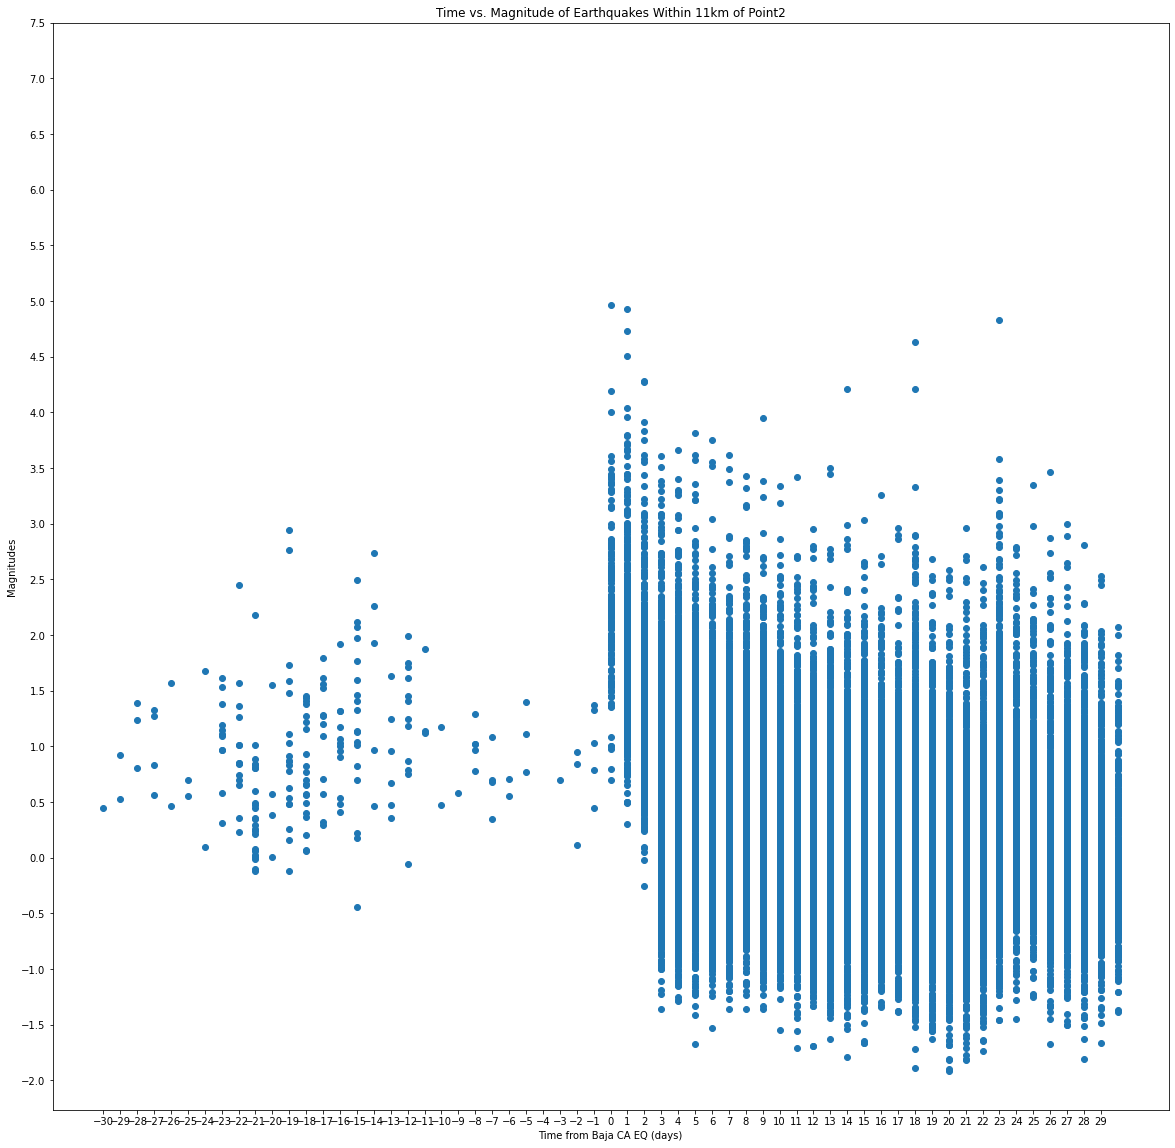

In [7]:
# Plot time vs. magnitude for Point2 data: days

plt.figure(figsize=(20,20))
plt.scatter(Point2Data_11KM["RELATIVE DAY"], Point2Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point2");
plt.xticks(range(-30, 30));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point2/Point2_MagnitudeDays.png", facecolor = "white");

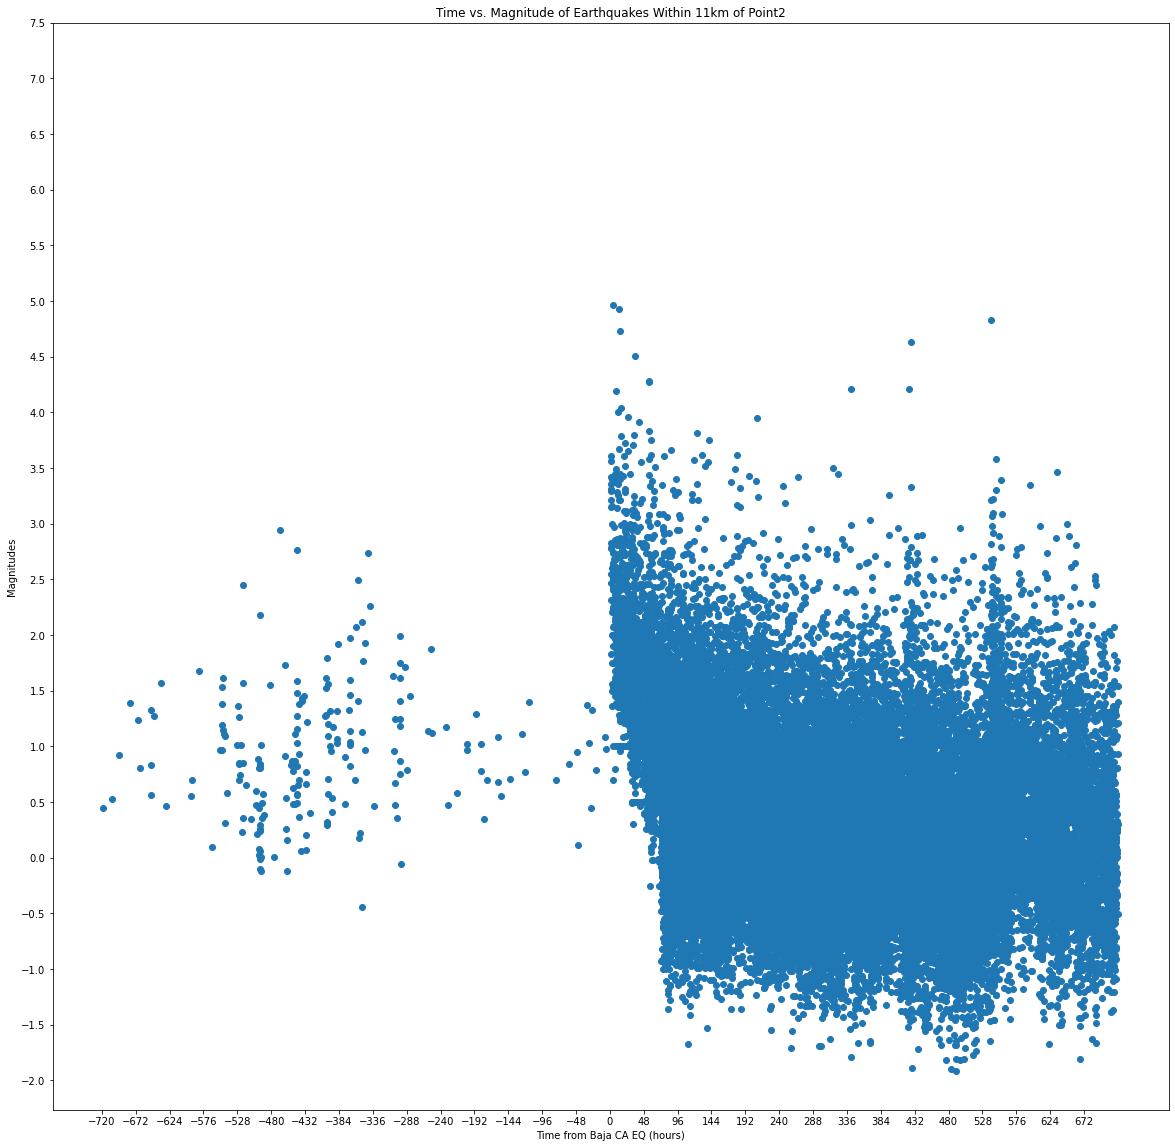

In [8]:
# Plot time vs. magnitude: hours

plt.figure(figsize=(20,20))
plt.scatter(Point2Data_11KM["RELATIVE HOUR"], Point2Data_11KM["MAGNITUDE"]);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Magnitudes");
plt.title("Time vs. Magnitude of Earthquakes Within 11km of Point2");
plt.xticks(range(-720,720, 48));
plt.yticks(np.arange(-2,8,0.5));

plt.savefig("Maps/Density Grid/Point2/Point2_MagnitudeHours.png", facecolor = "white");

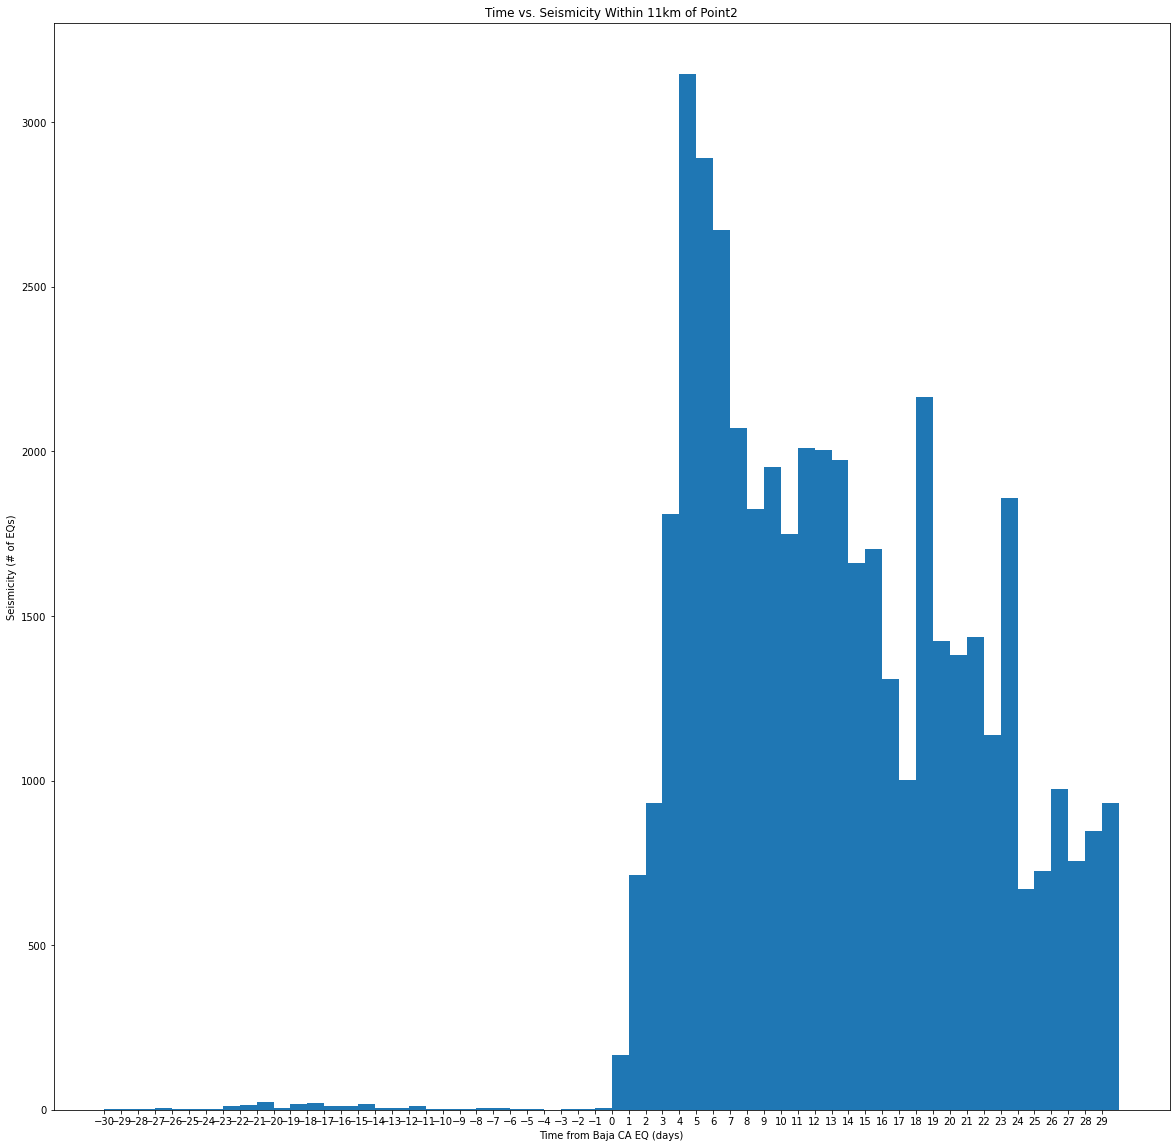

In [9]:
# Plot time vs. number of events: days

plt.figure(figsize=(20,20))
plt.hist(Point2Data_11KM["RELATIVE DAY"], bins = 60);
plt.xlabel("Time from Baja CA EQ (days)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point2");
plt.xticks(range(-30,30));

plt.savefig("Maps/Density Grid/Point2/Point2_SeismicityDays.png", facecolor = "white")

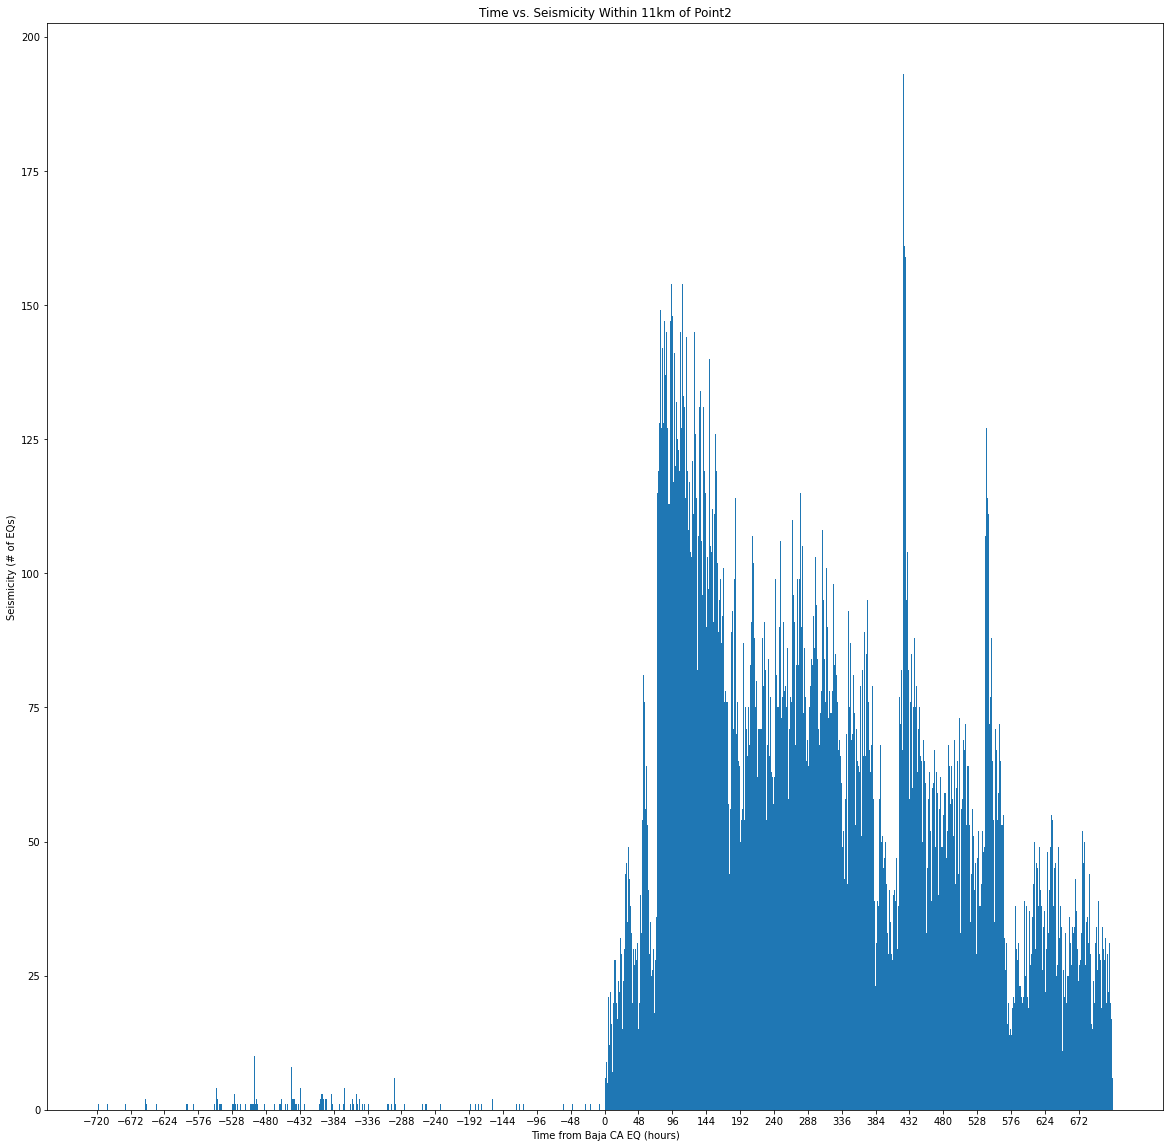

In [10]:
# Plot time vs. number of events: hours

plt.figure(figsize=(20,20))
plt.hist(Point2Data_11KM["RELATIVE HOUR"], bins = 60*24);
plt.xlabel("Time from Baja CA EQ (hours)");
plt.ylabel("Seismicity (# of EQs)");
plt.title("Time vs. Seismicity Within 11km of Point2");
plt.xticks(np.arange(-720, 720, 48));

plt.savefig("Maps/Density Grid/Point2/Point2_SeismicityHours.png", facecolor = "white")

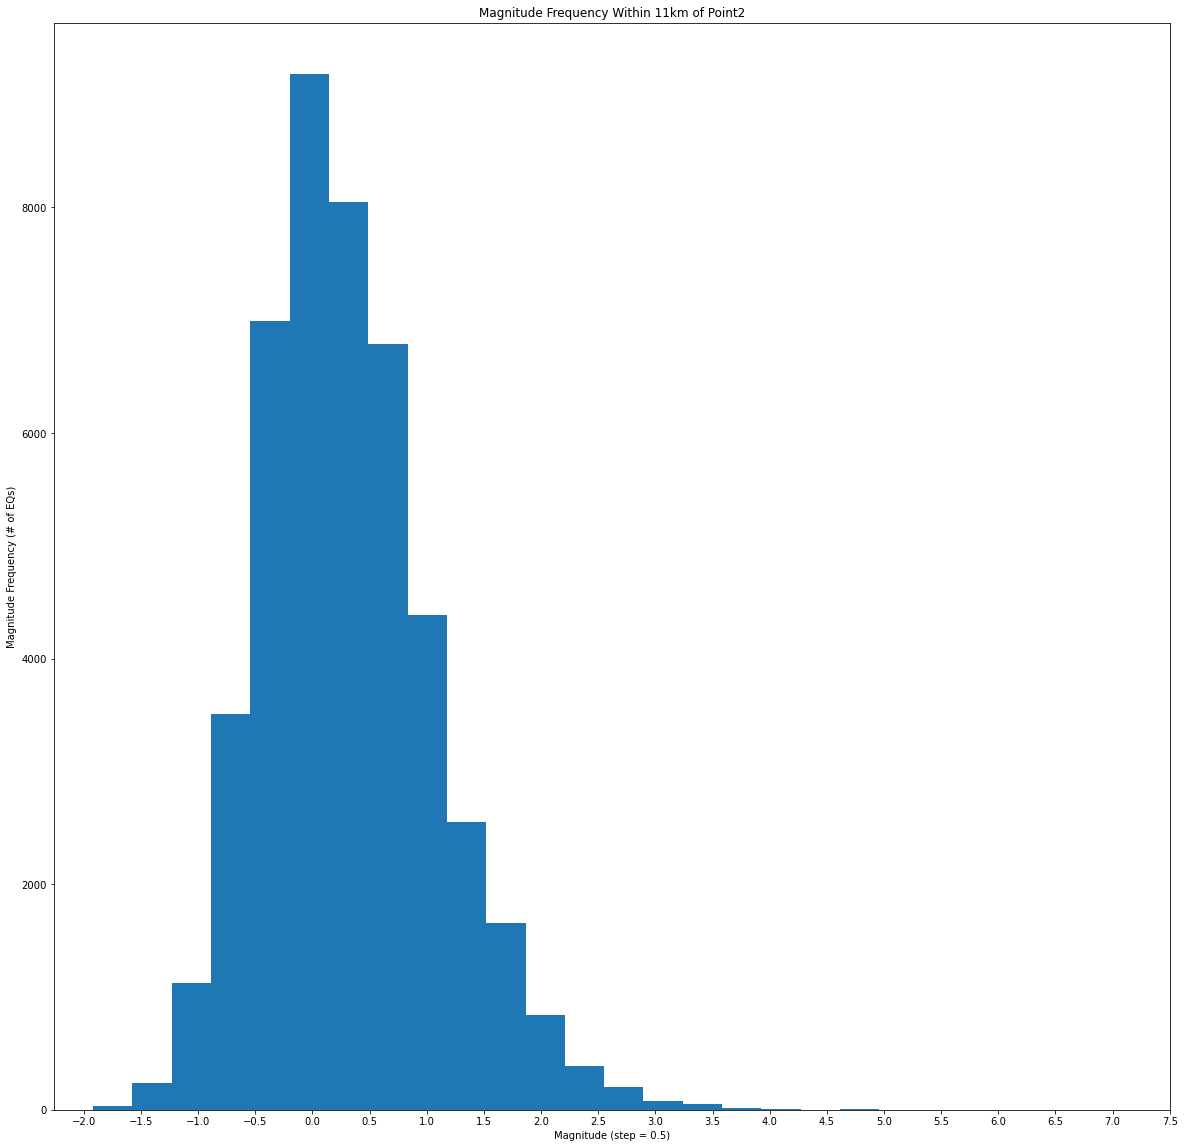

In [11]:
# Plot magnitude vs. event count (frequency)

plt.figure(figsize=(20,20))
plt.hist(Point2Data_11KM["MAGNITUDE"], bins = 20);
plt.xlabel("Magnitude (step = 0.5)");
plt.ylabel("Magnitude Frequency (# of EQs)");
plt.title("Magnitude Frequency Within 11km of Point2");
plt.xticks(np.arange(-2, 8, step = 0.5));

plt.savefig("Maps/Density Grid/Point2/Point2_MagFreq.png", facecolor = "white")